In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


#3. Cluster the following data: 

A1 - (6, 14), A2 - (6, 9), A3 - (12, 8), A4 - (9, 12), A5 - (11, 9),
A6 - (10, 8), A7 - (5, 6) , A8 - (8, 13)

Use k-means algorithm to find the clusters. 

Use 

(i)Manhattan metric and 

(ii) Euclidean metric.


(a) Find the best k using Davies Bouldin index.

(b) Plot J(c, µ) and the clusters.

In [ ]:
data = np.array([
                 [6 , 14],
                 [6 , 9],
                 [12 , 8],
                 [9 , 12], 
                 [11 , 9], 
                 [10 , 8], 
                 [5 , 6],
                 [8 , 13], 
])
data

array([[ 6, 14],
       [ 6,  9],
       [12,  8],
       [ 9, 12],
       [11,  9],
       [10,  8],
       [ 5,  6],
       [ 8, 13]])

In [ ]:
from scipy.spatial.distance import cdist
np.random.seed(0)
def kmeans(k,X,distance="euclidean"):
  temp = np.arange(len(X))
  np.random.shuffle(temp)
  centers = X[temp[:k]]
  #centers = X[np.random.randint(0,len(X),k)]
  oldindex = {j:[] for j in range(0,k)}
  while True:
    index = {j:[] for j in range(0,k)}
    dist = cdist(X,centers,distance)
    for i in range(len(dist)):
      cl = np.argmin(dist[i])
      index[cl].append(i)
    for i in range(len(centers)):
      centers[i] = np.sum(np.take(X,index[i],axis=0),axis=0) / np.max([len(index[i]),1])
    if index == oldindex:
      break 
    oldindex = index.copy()
  return centers,index

In [ ]:
# Find the best k using Davies Bouldin index.
def Davies_Bouldin_Index(data,distance="euclidean"):
  DBindex = []
  for k in range(2,9):
    centers,index = kmeans(k,data,distance)
    S = np.zeros(k)
    for i in range(k):
      if not index[i]:
        continue
      points = data[index[i],:]
      S[i] = cdist([centers[i]],points,distance).mean()
    M = cdist(centers,centers,distance)
    R = np.zeros((k,k))
    for i in range(k):
      for j in range(i+1,k):
        temp = (S[i]+S[j])/(M[i,j])
        if np.isnan(temp):
          temp = 0
        R[i,j] = R[j,i] = temp 
    R = np.max(R,axis=1).mean()
    DBindex.append(R)
  return DBindex

In [ ]:
# Using Manhattan distance
DB_Manhattan = Davies_Bouldin_Index(data,"cityblock")
DB_Euclidean = Davies_Bouldin_Index(data,"euclidean")

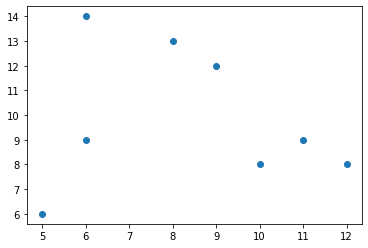

In [ ]:
plt.scatter(data[:,0],data[:,1])
plt.show()

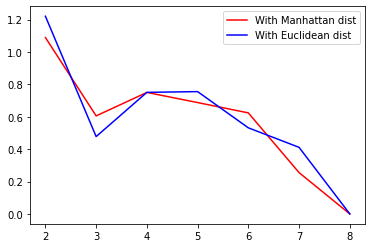

In [ ]:
k=range(2,9)
plt.plot(k,DB_Manhattan,"r-",k,DB_Euclidean,"b-")
plt.legend(labels=["With Manhattan dist","With Euclidean dist"])
plt.show()

In [ ]:
centers,index = kmeans(3,data)


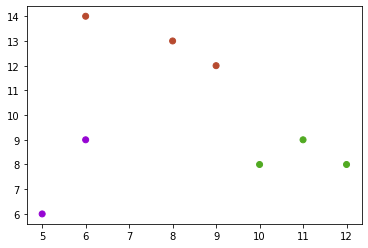

In [ ]:
c =  np.random.rand(len(data),3)
for i in index.values():
  c[i] = np.random.rand(3)
plt.scatter(data[:,0],data[:,1],c=c)
plt.show()

#4. Apply agglomerative and divisive clustering on A1 - (0, 8), A2 - (0, 3), A3 - (6, 2), A4 - (3, 6), A5 - (5, 3) , A6 - (4, 2), A7 - (−1, 0) , A8 - (2, 7) . Draw the dendogram.

In [ ]:
dt = np.array([
               [0,8],
               [0,3],
               [6,2],
               [3,6],
               [5,3],
               [4,2],
               [-1,0],
               [2,7]
])
dt

array([[ 0,  8],
       [ 0,  3],
       [ 6,  2],
       [ 3,  6],
       [ 5,  3],
       [ 4,  2],
       [-1,  0],
       [ 2,  7]])

In [ ]:
# Agglomertive clustering
def agglomerative(data,distance="euclidean"):
  heirarchy = []
  cluster = data.copy()

  cluster = cluster.tolist()
  cluster = [[j] for j in cluster]
  for i in range(len(data)):
    heirarchy.append(cluster.copy())
    if len(cluster) == 1:
      break
    mean = [] 
    for j in cluster:
      temp = np.zeros(len(data[0]))
      for k in j:
        temp += np.array(k)
      temp /= len(j)
      mean.append(temp)
    dist = cdist(mean,mean,metric=distance) + 1000*np.eye(len(mean))
    flag = np.array(np.where(dist == np.min(dist)))[:,0]
    new  = cluster[flag[0]] + cluster[flag[1]]
    if flag[0] < flag[1]:
      del cluster[flag[0]]
      del cluster[flag[1]-1]
    else:
      del cluster[flag[1]]
      del cluster[flag[0]-1]
    cluster.append(new)
  return heirarchy

  

#heirarchy

In [ ]:
h = agglomerative(dt)

In [ ]:
for j in range(len(h)):
  for k in range(len(h[j])):
    print(h[j][k],end="\t")
  print("\n")


[[0, 8]]	[[0, 3]]	[[6, 2]]	[[3, 6]]	[[5, 3]]	[[4, 2]]	[[-1, 0]]	[[2, 7]]	

[[0, 8]]	[[0, 3]]	[[3, 6]]	[[4, 2]]	[[-1, 0]]	[[2, 7]]	[[6, 2], [5, 3]]	

[[0, 8]]	[[0, 3]]	[[4, 2]]	[[-1, 0]]	[[6, 2], [5, 3]]	[[3, 6], [2, 7]]	

[[0, 8]]	[[0, 3]]	[[-1, 0]]	[[3, 6], [2, 7]]	[[4, 2], [6, 2], [5, 3]]	

[[0, 3]]	[[-1, 0]]	[[4, 2], [6, 2], [5, 3]]	[[0, 8], [3, 6], [2, 7]]	

[[4, 2], [6, 2], [5, 3]]	[[0, 8], [3, 6], [2, 7]]	[[0, 3], [-1, 0]]	

[[0, 8], [3, 6], [2, 7]]	[[4, 2], [6, 2], [5, 3], [0, 3], [-1, 0]]	

[[0, 8], [3, 6], [2, 7], [4, 2], [6, 2], [5, 3], [0, 3], [-1, 0]]	



In [ ]:
# Divisive clustering
cluster = dt.copy()

cluster = [cluster.tolist()]
print(cluster,"\n")
for i in range(len(dt)):
  if len(cluster) == len(dt):
    break
  temp = [[],[]]
  for j in range(len(cluster)):
    dist = cdist(cluster[j],cluster[j])
    sdist = np.sum(dist,axis=1)
    max_val = np.max(sdist)
    flag = np.argmax(sdist)
    temp[0].append(max_val)
    temp[1].append(flag)
  
  ind = np.argmax(temp[1])
  new_cluster = [cluster[ind][temp[1][ind]]]
  cluster[ind].remove(new_cluster[0])
  
  for k in cluster[ind].copy():
    if k not in new_cluster:
      d1 = cdist([k],cluster[ind]).mean()
      d2 = cdist([k],new_cluster).mean()
      if d1 >= d2:
        new_cluster.append(k)
        cluster[ind].remove(k)
  
  for m in cluster.copy():
    if not m:
      cluster.remove(m)
  cluster.append(new_cluster)
  for l in cluster:
    print(l,end="\t")
  print("\n")

[[[0, 8], [0, 3], [6, 2], [3, 6], [5, 3], [4, 2], [-1, 0], [2, 7]]] 

[[0, 8], [6, 2], [3, 6], [5, 3], [4, 2], [2, 7]]	[[-1, 0], [0, 3]]	

[[6, 2], [3, 6], [5, 3], [4, 2]]	[[-1, 0], [0, 3]]	[[0, 8], [2, 7]]	

[[6, 2], [5, 3], [4, 2]]	[[-1, 0], [0, 3]]	[[0, 8], [2, 7]]	[[3, 6]]	

[[5, 3], [4, 2]]	[[-1, 0], [0, 3]]	[[0, 8], [2, 7]]	[[3, 6]]	[[6, 2]]	

[[4, 2]]	[[-1, 0], [0, 3]]	[[0, 8], [2, 7]]	[[3, 6]]	[[6, 2]]	[[5, 3]]	

[[-1, 0], [0, 3]]	[[0, 8], [2, 7]]	[[3, 6]]	[[6, 2]]	[[5, 3]]	[[4, 2]]	

[[0, 3]]	[[0, 8], [2, 7]]	[[3, 6]]	[[6, 2]]	[[5, 3]]	[[4, 2]]	[[-1, 0]]	

[[0, 8], [2, 7]]	[[3, 6]]	[[6, 2]]	[[5, 3]]	[[4, 2]]	[[-1, 0]]	[[0, 3]]	



#5. Apply k means, hierarchical clustering and KSOM on Data 1 and Data 2. (No: of clusters 3)

(a) Report the cluster centers for k means.

(b) Discuss the method used to prevent the initialization issues in k means.

(c) Plot the clusters.

(d) Plot J(c, µ) for k means.(e) Apply KSOM visualization techniques.

In [ ]:
dt1 = pd.read_csv("/content/drive/MyDrive/DM_A_6/data1.csv",header=None)
dt1.head()

,0,1
0,0.17176,1.38070
1,1.30420,0.39963
2,0.29626,1.65620
3,0.95062,0.14257
4,1.67490,0.76618


In [ ]:
centers,index = kmeans(3,dt1.values)

In [ ]:
# Centers of k mean
print(centers)

[[ 9.6901731e-01  9.7551245e-01]
 [-1.7655450e-04  5.0115570e+00]
 [ 3.9892065e+00  6.0057065e+00]]


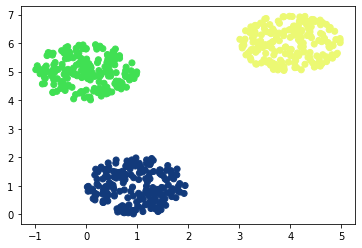

In [ ]:
c =  np.random.rand(len(dt1.values),3)
for i in index.values():
  c[i] = np.random.rand(3)
plt.scatter(dt1.values[:,0],dt1.values[:,1],c=c)
plt.show()

In [ ]:
# Agglomerative clustering

heir = agglomerative(dt1.values)

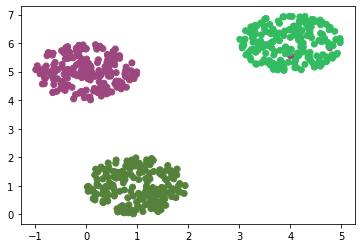

In [ ]:
c =  np.random.rand(len(dt1.values),3)
c1 = np.random.rand(3)
c2 = np.random.rand(3)
c3 = np.random.rand(3)
for i in range(len(dt1.values)):
  if (dt1.values[i] == heir[-3][0]).any():
    c[i] = c1
  elif (dt1.values[i] == heir[-3][1]).any():
    c[i] = c2
  else:
    c[i] = c3
plt.scatter(dt1.values[:,0],dt1.values[:,1],c=c)
plt.show()

In [ ]:
# KSOM


def KSOM(data,nodes,T=100,r=8):

  W = np.random.random(size=(len(nodes),len(data[0])))
  t = 0
  while t < T:
      learning_radius = r*(1-(t/T))
      for i in range(len(data)):
        dist = []
        for j in range(len(W)):
          dist.append(np.linalg.norm(W[j]-data[i]))
        least = np.argmin(dist)

        for k in range(len(W)):
          W[k] = W[k] + 0.5*np.exp(-(np.linalg.norm(nodes[least]-nodes[k])/learning_radius))*(data[i]-W[k])

      t = t+1
  return W

In [ ]:
nodes = np.array([
     [0,0],
     [10,0],
     [5,8.66]
])

weights = KSOM(dt1.values,nodes)

In [ ]:
print(weights)

[[ 1.37803611  0.63266186]
 [ 3.81939418  6.46624347]
 [-0.03075205  4.59243053]]


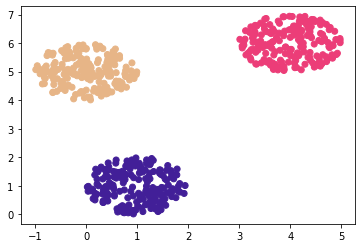

In [ ]:
c =  np.random.rand(len(dt1.values),3)
c1 = np.random.rand(3)
c2 = np.random.rand(3)
c3 = np.random.rand(3)
for i in range(len(dt1.values)):
  d1 = np.linalg.norm(weights[0]-dt1.values[i])
  d2 = np.linalg.norm(weights[1]-dt1.values[i])
  d3 = np.linalg.norm(weights[2]-dt1.values[i])
  if d1 <= d2 and d1 <= d3:
    c[i] = c1
  elif d2 <= d1 and d2 <= d3:
    c[i] = c2
  else:
    c[i] = c3
plt.scatter(dt1.values[:,0],dt1.values[:,1],c=c)
plt.show()

#6. Apply, k means, hierarchical clustering and KSOM on Mturk User-Perceived Clusters over Images Data Set. Assess the quality of the clusters.

In [ ]:
dt2 = pd.read_csv("/content/drive/MyDrive/DM_A_6/data_feature.csv",header=None)
dt2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,2,0,0,0,0,1,1,5,0,1,0,0,2,0,0,1,1,0,0,0,1,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,1,1,1,3,3,0,2,1,0,2,1,1,0,0,1,0,2,0,1,1,0,0,5,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0
1,1,1,1,0,1,0,1,0,0,4,0,4,2,0,1,0,0,1,0,1,2,0,0,0,1,0,0,0,0,0,0,2,3,1,0,0,0,0,0,2,...,4,1,1,1,3,0,2,1,3,0,0,1,1,0,0,0,3,2,0,0,0,1,0,2,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
2,0,0,1,4,0,1,0,4,3,1,2,0,1,1,0,2,0,0,1,0,0,0,0,1,0,0,1,0,1,0,3,0,0,2,1,1,0,0,1,1,...,2,0,0,3,0,0,0,0,1,1,1,0,2,0,3,0,0,0,0,0,0,1,0,0,1,6,0,0,1,0,1,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,1,0,0,0,2,1,1,1,1,0,0,2,0,0,6,2,0,4,0,0,1,4,1,2,0,0,1,1,3,1,...,0,0,3,2,2,2,0,2,0,0,0,0,4,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,4,0,0,0,1
4,1,1,0,0,1,0,1,0,0,2,1,0,0,0,0,3,2,1,0,2,1,0,0,0,2,0,0,0,1,0,0,1,1,0,0,1,5,5,0,0,...,0,0,0,0,0,0,2,0,1,1,0,1,1,3,2,0,0,0,0,0,1,2,1,0,0,0,2,1,0,0,2,1,0,0,3,0,1,1,0,1


In [ ]:
clusters_count = 30

In [ ]:
centers,index = kmeans(clusters_count,dt2.values)

In [ ]:
for k,v in index.items():
  print(k ," : ", v)

0  :  [15, 47, 68]
1  :  [6, 41, 58, 60, 83, 125, 127, 130, 158, 160]
2  :  [109]
3  :  [87]
4  :  [2, 18, 29, 38, 56, 75, 86, 92, 93, 102, 103, 106, 114, 122, 129, 132, 159, 169, 170, 172, 178]
5  :  [0, 10, 19, 39, 65, 66, 95, 96, 111, 112, 133, 144, 145, 171]
6  :  [153]
7  :  [78, 118, 128]
8  :  [1, 7, 8, 21, 30, 34, 40, 44, 49, 64, 67, 72, 76, 89, 94, 105, 123, 131, 136, 141, 143, 146, 149, 163, 166]
9  :  [13, 17, 26, 27, 43, 63, 71, 81, 88, 99, 117, 121, 139, 147, 152, 155, 156, 174]
10  :  [11]
11  :  [4, 5, 12, 14, 20, 23, 35, 62, 84, 85, 98, 100, 107, 108, 115, 119, 120, 134, 135, 137, 140, 161, 165, 168, 177]
12  :  [167]
13  :  [104]
14  :  [9]
15  :  [22, 45, 53]
16  :  [70]
17  :  [33]
18  :  [148, 154, 179]
19  :  [59, 90, 101, 126, 150, 173, 176]
20  :  [46]
21  :  [48, 55, 73, 74, 79, 91, 110, 113, 124, 162, 164]
22  :  [54]
23  :  [31, 175]
24  :  [3, 16, 24, 28, 36, 37, 42, 57, 61, 69, 82, 97, 116, 138, 142, 151]
25  :  [52]
26  :  [50, 80]
27  :  [32]
28  :  [77]
2

In [ ]:

k = clusters_count
S = np.zeros(k)
for i in range(k):
  if not index[i]:
    continue
  points = dt2.values[index[i],:]
  S[i] = cdist([centers[i]],points).mean()
M = cdist(centers,centers)
R = np.zeros((k,k))
for i in range(k):
  for j in range(i+1,k):
    temp = (S[i]+S[j])/(M[i,j])
    if np.isnan(temp):
      temp = 0
    R[i,j] = R[j,i] = temp 
R = np.max(R,axis=1).mean()


In [ ]:
R

1.8170128232996345

In [ ]:
h = agglomerative(dt2.values,distance="cityblock")[-clusters_count]

In [ ]:
cluster_dict = {i:[] for i in range(clusters_count)}
for j in range(len(h)):
  for k in range(len(h[j])):
    for m in range(len(dt2.values)):
      if np.array_equal(dt2.values[m],h[j][k]):
        cluster_dict[j].append(m)

In [ ]:
for k,v in cluster_dict.items():
  print(k ," : ", v)

0  :  [3]
1  :  [8]
2  :  [9]
3  :  [11]
4  :  [12]
5  :  [15]
6  :  [21]
7  :  [22]
8  :  [24]
9  :  [45]
10  :  [47]
11  :  [50]
12  :  [51]
13  :  [53]
14  :  [54]
15  :  [67]
16  :  [68]
17  :  [70]
18  :  [77]
19  :  [80]
20  :  [104]
21  :  [108]
22  :  [114]
23  :  [125]
24  :  [130]
25  :  [131]
26  :  [153]
27  :  [157]
28  :  [173]
29  :  [167, 98, 140, 52, 31, 146, 115, 58, 35, 158, 166, 156, 137, 29, 5, 86, 174, 164, 155, 147, 149, 64, 69, 175, 165, 41, 84, 42, 97, 163, 48, 111, 121, 151, 134, 1, 159, 89, 141, 49, 82, 23, 7, 33, 177, 85, 176, 129, 169, 46, 26, 25, 83, 71, 139, 126, 103, 170, 172, 119, 28, 76, 144, 34, 109, 13, 117, 4, 57, 136, 40, 106, 152, 122, 30, 2, 10, 66, 72, 75, 37, 55, 178, 20, 168, 88, 100, 142, 18, 94, 59, 120, 92, 74, 145, 124, 44, 91, 73, 32, 96, 43, 79, 0, 81, 162, 87, 36, 63, 135, 38, 99, 143, 17, 62, 179, 14, 65, 39, 27, 56, 110, 150, 133, 171, 19, 112, 95, 148, 60, 6, 127, 101, 90, 118, 132, 154, 16, 107, 78, 128, 116, 161, 93, 102, 113, 160,

In [ ]:

# KSOM


nodes = np.array([[i,j] for i in np.linspace(1,31,6) for j in np.linspace(1,25,5)])

In [ ]:
weights = KSOM(dt2.values,nodes,r=25)

In [ ]:
c = np.argmin(cdist(dt2.values,weights),axis=1)

In [ ]:
c

array([19, 10, 19, 13, 19, 22, 17, 10, 27, 22, 10, 22,  2, 10, 19, 18, 19,
       19, 11, 19, 10, 23, 14, 11, 10, 19, 19, 19,  3, 26, 10, 21, 19, 11,
       10,  2, 19, 19, 11, 19, 10, 17, 10, 19, 19, 14, 22, 18,  8, 10, 25,
       15,  8, 29, 28, 19, 19, 10,  6,  3,  1, 19, 19, 11, 27, 19,  4, 21,
       18, 10, 16, 19,  4, 19, 19,  3, 22, 29,  1, 19, 25, 19, 10,  6, 11,
       19, 26, 19, 19, 10,  1, 19,  8,  7,  3, 19, 11, 22, 11, 11, 19,  1,
        7,  7, 24,  4, 11, 19, 22, 19, 19,  4, 19, 17, 20, 22, 19, 19,  1,
       19, 19, 16, 10,  9, 19,  6,  3, 17,  0,  7,  8,  9, 19, 19, 19, 19,
       10,  2, 19, 19, 19, 21,  3, 19, 11, 19, 10, 19, 19, 10, 17, 13, 19,
       16, 12, 11, 22, 15,  8, 11, 17, 19, 10, 13, 10, 19, 10,  4, 19, 19,
       26,  3, 11,  5, 19, 21,  3, 19,  3, 19])